In [9]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("fashion-mnist_train.csv")

In [18]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming df is a DataFrame with features and labels
X = df.drop("label", axis=1).values
y = df["label"].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN (assuming 28x28 grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [20]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout
 # Building the CNN model
 model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Output layer for 10 categories
 ])
 
# Compile the model
 model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
 
# Train the model
 history = model.fit(X_train, y_train, epochs=15,validation_split=0.2, batch_size=64)

Epoch 1/15
600/600 [==============================] - 16s 21ms/step - loss: 0.8034 - accuracy: 0.7091 - val_loss: 0.4986 - val_accuracy: 0.8142
Epoch 2/15
600/600 [==============================] - 12s 20ms/step - loss: 0.5294 - accuracy: 0.8092 - val_loss: 0.4405 - val_accuracy: 0.8382
Epoch 3/15
600/600 [==============================] - 10s 17ms/step - loss: 0.4510 - accuracy: 0.8386 - val_loss: 0.4059 - val_accuracy: 0.8521
Epoch 4/15
600/600 [==============================] - 11s 18ms/step - loss: 0.4062 - accuracy: 0.8541 - val_loss: 0.3455 - val_accuracy: 0.8734
Epoch 5/15
600/600 [==============================] - 10s 17ms/step - loss: 0.3745 - accuracy: 0.8653 - val_loss: 0.3367 - val_accuracy: 0.8779
Epoch 6/15
600/600 [==============================] - 10s 17ms/step - loss: 0.3488 - accuracy: 0.8735 - val_loss: 0.3222 - val_accuracy: 0.8816
Epoch 7/15
600/600 [==============================] - 11s 18ms/step - loss: 0.3200 - accuracy: 0.8837 - val_loss: 0.3105 - val_accuracy:

In [ ]:
 # Model Evaluation
 test_loss, test_acc = model.evaluate(X_test, y_test)
 print(f'Test Accuracy: {test_acc}')
 # Plotting Training History
 plt.plot(history.history['accuracy'], label='Training Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()

347/375 [==========================>...] - ETA: 0s - loss: 0.3269 - accuracy: 0.8908

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout
 # Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Output layer for 10 categories
 ])
 
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
 
# Train the model
history = model.fit(X_train, y_train, epochs=10,validation_split=0.2, batch_size=64)

Epoch 1/10
100/100 [==============================] - 3s 20ms/step - loss: 1.1321 - accuracy: 0.5944 - val_loss: 0.6468 - val_accuracy: 0.7669
Epoch 2/10
100/100 [==============================] - 2s 19ms/step - loss: 0.6810 - accuracy: 0.7508 - val_loss: 0.5607 - val_accuracy: 0.7969
Epoch 3/10
100/100 [==============================] - 2s 17ms/step - loss: 0.5760 - accuracy: 0.7895 - val_loss: 0.5129 - val_accuracy: 0.8169
Epoch 4/10
100/100 [==============================] - 2s 18ms/step - loss: 0.5216 - accuracy: 0.8106 - val_loss: 0.4754 - val_accuracy: 0.8294
Epoch 5/10
100/100 [==============================] - 2s 17ms/step - loss: 0.4770 - accuracy: 0.8245 - val_loss: 0.4530 - val_accuracy: 0.8363
Epoch 6/10
100/100 [==============================] - 2s 16ms/step - loss: 0.4402 - accuracy: 0.8344 - val_loss: 0.4562 - val_accuracy: 0.8263
Epoch 7/10
100/100 [==============================] - 2s 17ms/step - loss: 0.4120 - accuracy: 0.8489 - val_loss: 0.4273 - val_accuracy: 0.8469

63/63 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8625
Test Accuracy: 0.862500011920929


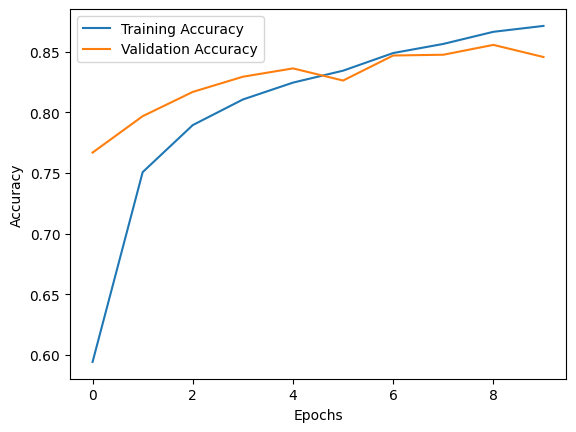

In [14]:
 # Model Evaluation
 test_loss, test_acc = model.evaluate(X_test, y_test)
 print(f'Test Accuracy: {test_acc}')
 # Plotting Training History
 plt.plot(history.history['accuracy'], label='Training Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()